In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For Reading File:

In [ ]:
df=pd.read_csv('gender_classification_v7.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


For Counting Gender:

In [ ]:
gender_count=df['gender'].value_counts()
print("Gender Count : ",gender_count)

Gender Count :  gender
Female    2501
Male      2500
Name: count, dtype: int64


Stats for forehead_height_cm:

In [ ]:
forehead_width_mean = df['forehead_width_cm'].mean()
forehead_width_median = df['forehead_width_cm'].median()
forehead_width_std = df['forehead_width_cm'].std()

print(f" Mean: {forehead_width_mean:.2f}")
print(f" Median: {forehead_width_median:.2f}")
print(f" Standard Deviation: {forehead_width_std:.2f}")


 Mean: 13.18
 Median: 13.10
 Standard Deviation: 1.11


How many individual have long hair or not:

In [ ]:
long_hair_count=df['long_hair'].value_counts()
print("Long Hair Count : ",long_hair_count)

Long Hair Count :  long_hair
1    4349
0     652
Name: count, dtype: int64


Data Cleaning:

In [ ]:
df['forehead_ratio'] = df['forehead_width_cm'] / df['forehead_height_cm']
print("\n[Q6] New column 'forehead_ratio' created (First 5 values):")
print(df[['forehead_width_cm', 'forehead_height_cm', 'forehead_ratio']].head())


[Q6] New column 'forehead_ratio' created (First 5 values):
   forehead_width_cm  forehead_height_cm  forehead_ratio
0               11.8                 6.1        1.934426
1               14.0                 5.4        2.592593
2               11.8                 6.3        1.873016
3               14.4                 6.1        2.360656
4               13.5                 5.9        2.288136


Male and long Hair:

In [ ]:
filter=df.loc[(df['gender']=='Male')&(df['long_hair']==0)]
count_filter=len(filter)
print(f"No of Male with No Long Hair : {count_filter}")
print(filter.head())

No of Male with No Long Hair : 335
    long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
2           0               11.8                 6.3          1          1   
3           0               14.4                 6.1          0          1   
10          0               12.5                 5.4          1          1   
12          0               14.7                 5.2          1          1   
15          0               12.5                 5.2          1          1   

    lips_thin  distance_nose_to_lip_long gender  forehead_ratio  
2           1                          1   Male        1.873016  
3           1                          1   Male        2.360656  
10          1                          1   Male        2.314815  
12          1                          1   Male        2.826923  
15          1                          1   Male        2.403846  


/tmp/ipython-input-544067471.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




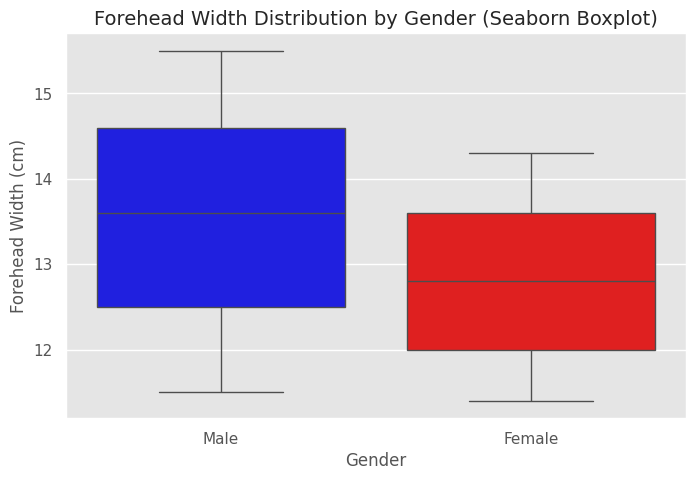

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='forehead_width_cm', data=df, palette={'Male': 'blue', 'Female': 'red'})
plt.title('Forehead Width Distribution by Gender (Seaborn Boxplot)', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Forehead Width (cm)')
plt.show()

/tmp/ipython-input-741731547.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




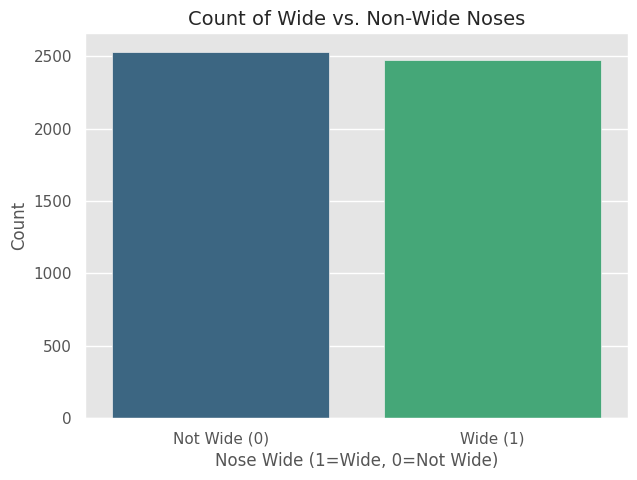

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='nose_wide', data=df, palette='viridis')
plt.title('Count of Wide vs. Non-Wide Noses', fontsize=14)
plt.xlabel('Nose Wide (1=Wide, 0=Not Wide)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Wide (0)', 'Wide (1)'])
plt.show()